In [44]:
import matplotlib.pyplot as plt
import numpy as np

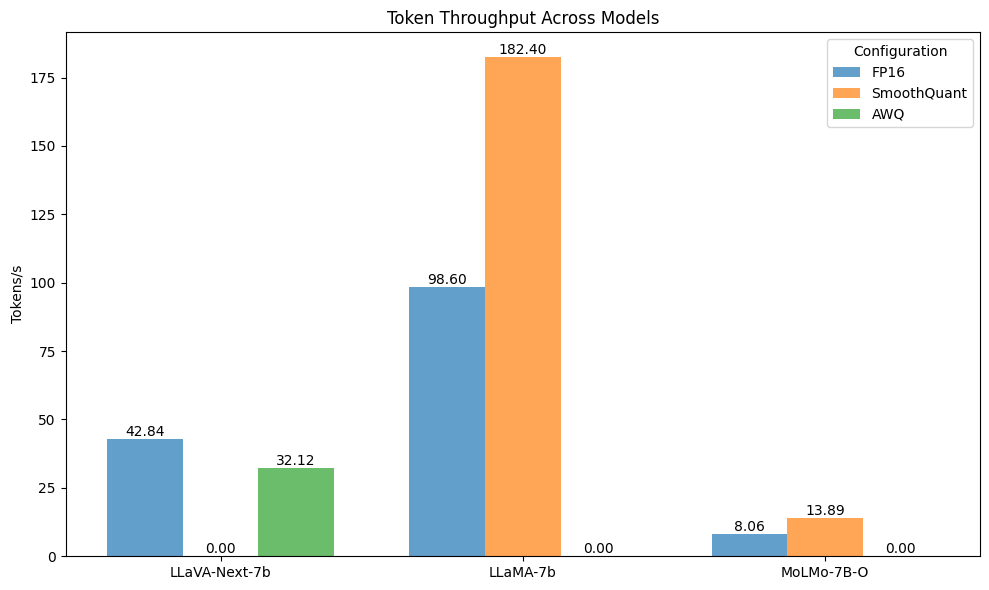

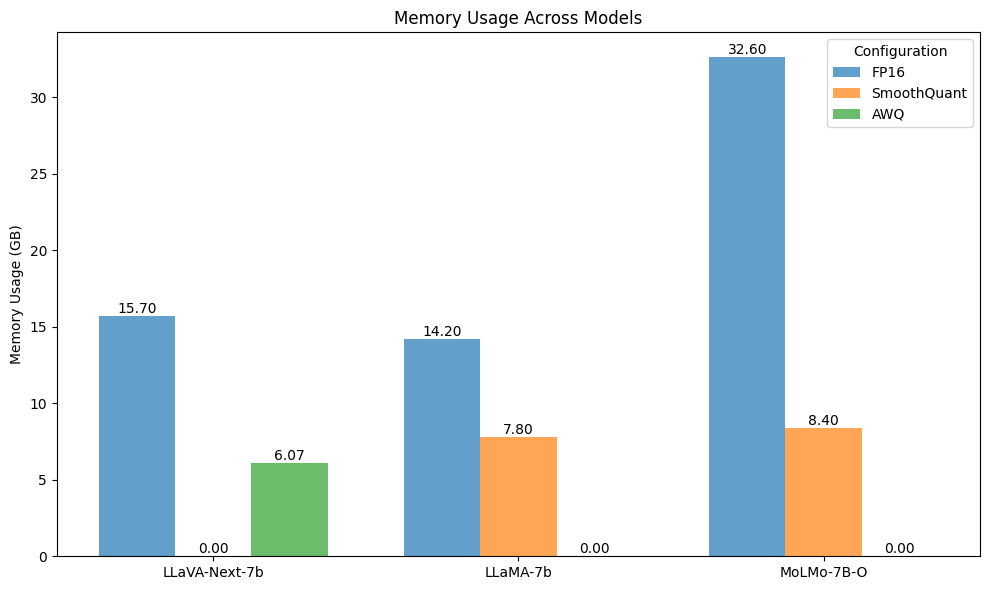

In [45]:
# Data
categories = ["LLaVA-Next-7b", "LLaMA-7b", "MoLMo-7B-O"]
subcategories = ["FP16", "SmoothQuant", "AWQ"]
tokens_per_sec = [[42.84, 0.0, 32.12], [98.6, 182.4, 0.0], [8.0645, 13.889, 0.0]]
memory_usage = [[15.7, 0.0, 6.07], [14.2, 7.8, 0.0], [32.6, 8.4, 0.0]]

# Settings
bar_width = 0.25
x_indices = np.arange(len(categories))
subcategory_offset = np.array([-bar_width, 0, bar_width])

# Plot Tokens per Second
fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i, sub in enumerate(subcategories):
    bar = ax.bar(
        x_indices + subcategory_offset[i],
        [tokens_per_sec[j][i] for j in range(len(categories))],
        width=bar_width,
        label=sub,
        alpha=0.7,
    )
    bars.append(bar)

ax.set_xticks(x_indices)
ax.set_xticklabels(categories)
ax.set_ylabel("Tokens/s")
ax.set_title("Token Throughput Across Models")
ax.legend(title="Configuration")

# Add labels for the bars
for bar_group in bars:
    ax.bar_label(bar_group, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()

bars = []

# Plot Memory Usage
fig, ax = plt.subplots(figsize=(10, 6))
for i, sub in enumerate(subcategories):
    bar = ax.bar(
        x_indices + subcategory_offset[i],
        [memory_usage[j][i] for j in range(len(categories))],
        width=bar_width,
        label=sub,
        alpha=0.7,
    )
    bars.append(bar)

ax.set_xticks(x_indices)
ax.set_xticklabels(categories)
ax.set_ylabel("Memory Usage (GB)")
ax.set_title("Memory Usage Across Models")
ax.legend(title="Configuration")

# Add labels for the bars
for bar_group in bars:
    ax.bar_label(bar_group, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()

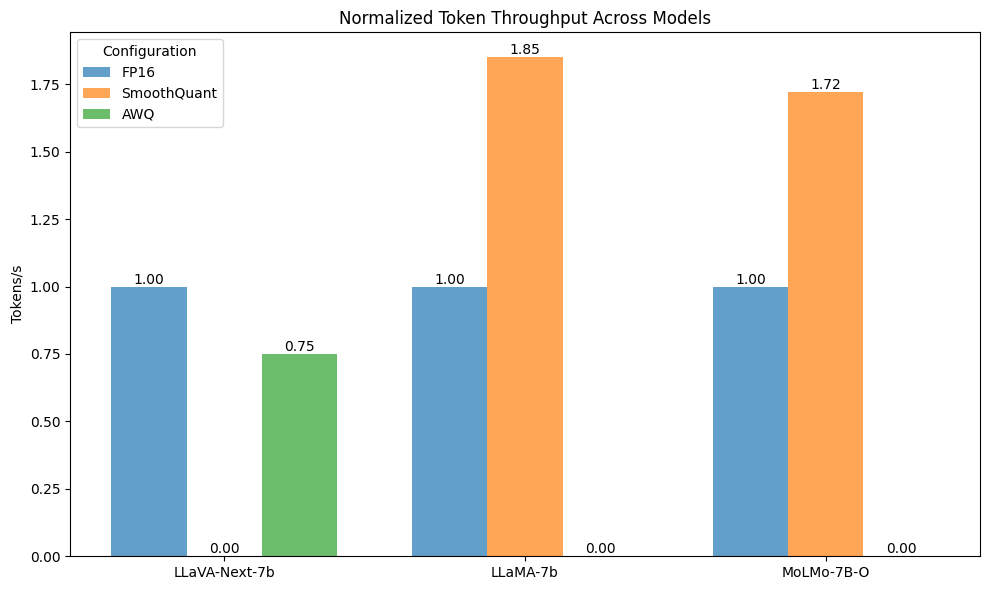

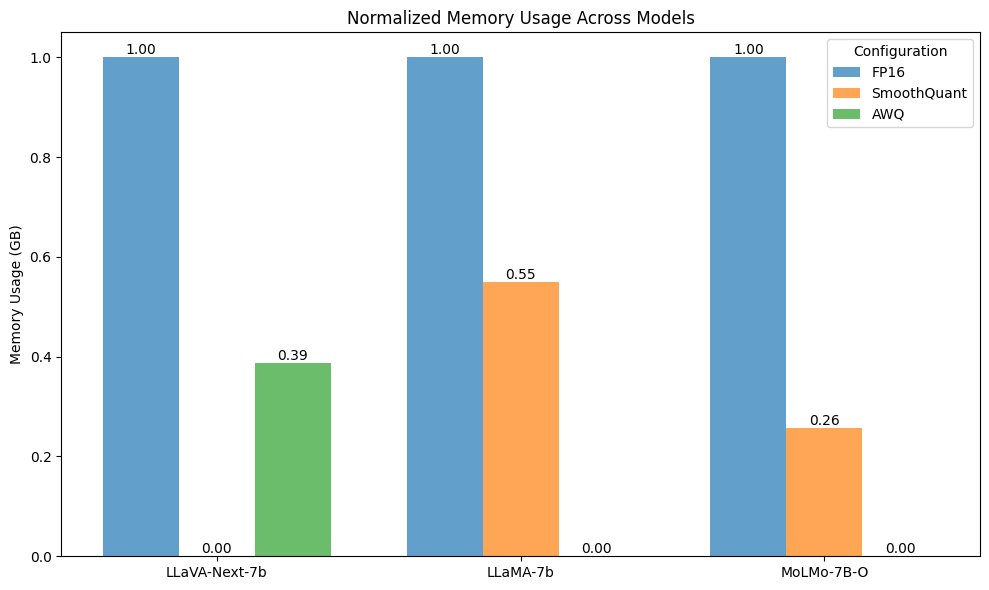

In [46]:
# Data
categories = ["LLaVA-Next-7b", "LLaMA-7b", "MoLMo-7B-O"]
subcategories = ["FP16", "SmoothQuant", "AWQ"]
tokens_per_sec = [np.array([42.84, 0.0, 32.12]) / 42.84, np.array([98.6, 182.4, 0.0]) / 98.6, np.array([8.0645, 13.889, 0.0]) / 8.0645]
memory_usage = [np.array([15.7, 0.0, 6.07]) / 15.7, np.array([14.2, 7.8, 0.0]) / 14.2, np.array([32.6, 8.4, 0.0]) / 32.6]

# Settings
bar_width = 0.25
x_indices = np.arange(len(categories))
subcategory_offset = np.array([-bar_width, 0, bar_width])

# Plot Tokens per Second
fig, ax = plt.subplots(figsize=(10, 6))
bars = []s

for i, sub in enumerate(subcategories):
    bar = ax.bar(
        x_indices + subcategory_offset[i],
        [tokens_per_sec[j][i] for j in range(len(categories))],
        width=bar_width,
        label=sub,
        alpha=0.7,
    )
    bars.append(bar)

ax.set_xticks(x_indices)
ax.set_xticklabels(categories)
ax.set_ylabel("Tokens/s")
ax.set_title("Normalized Token Throughput Across Models")
ax.legend(title="Configuration")

# Add labels for the bars
for bar_group in bars:
    ax.bar_label(bar_group, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()

bars = []

# Plot Memory Usage
fig, ax = plt.subplots(figsize=(10, 6))
for i, sub in enumerate(subcategories):
    bar = ax.bar(
        x_indices + subcategory_offset[i],
        [memory_usage[j][i] for j in range(len(categories))],
        width=bar_width,
        label=sub,
        alpha=0.7,
    )
    bars.append(bar)

ax.set_xticks(x_indices)
ax.set_xticklabels(categories)
ax.set_ylabel("Memory Usage (GB)")
ax.set_title("Normalized Memory Usage Across Models")
ax.legend(title="Configuration")

# Add labels for the bars
for bar_group in bars:
    ax.bar_label(bar_group, fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()

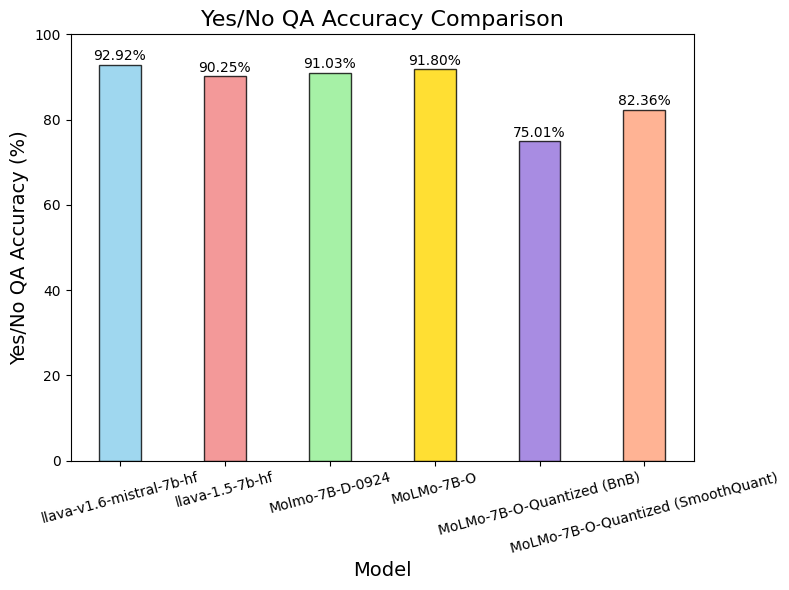

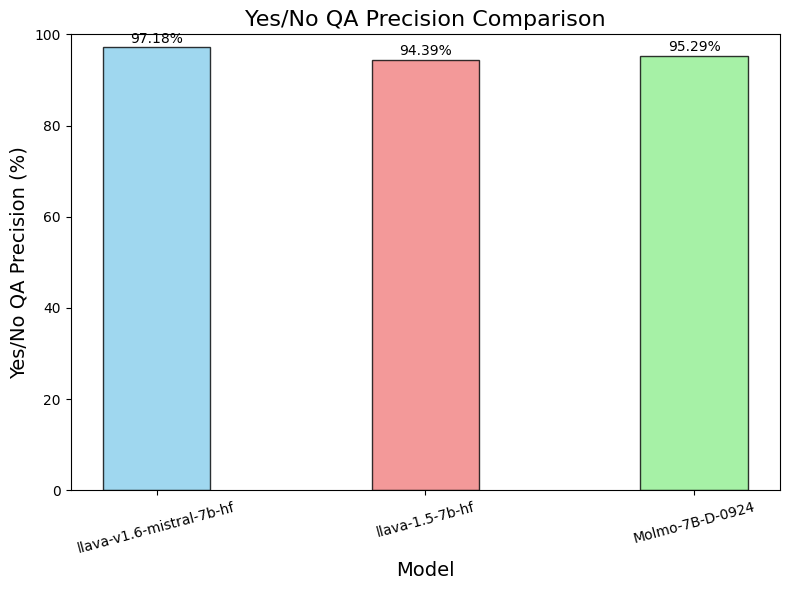

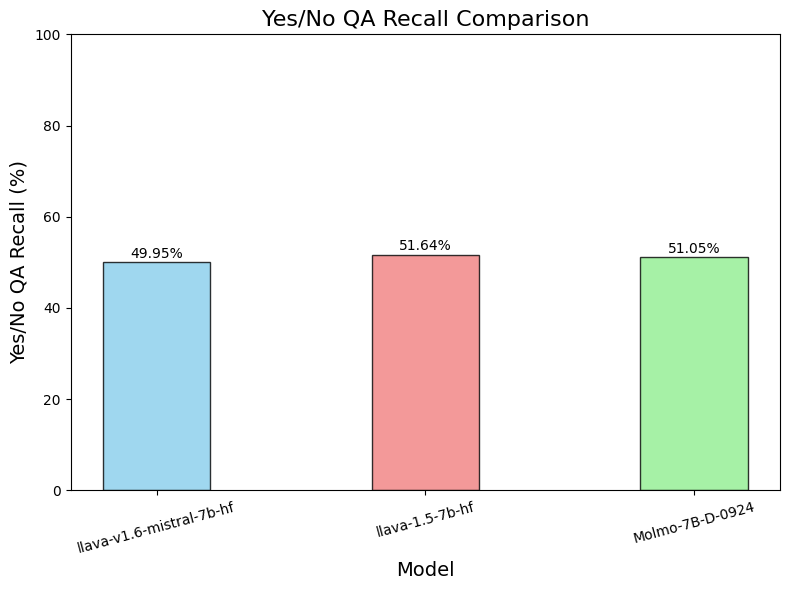

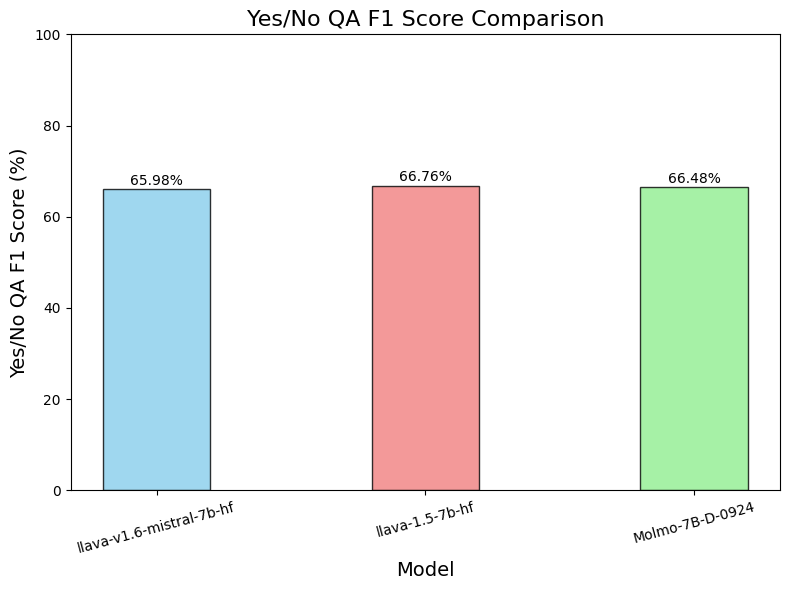

In [47]:
models_acc = [
    "llava-v1.6-mistral-7b-hf",
    "llava-1.5-7b-hf",
    "Molmo-7B-D-0924",
    "MoLMo-7B-O",
    "MoLMo-7B-O-Quantized (BnB)",
    "MoLMo-7B-O-Quantized (SmoothQuant)"
]
models = [
    "llava-v1.6-mistral-7b-hf",
    "llava-1.5-7b-hf",
    "Molmo-7B-D-0924"
]

metrics = {
    "Yes/No QA Accuracy": [92.92, 90.25, 91.03, 91.8, 75.01, 82.36],
    "Yes/No QA Precision": [97.18, 94.39, 95.29],
    "Yes/No QA Recall": [49.95, 51.64, 51.05],
    "Yes/No QA F1 Score": [65.98, 66.76, 66.48],
}

def plot_metric(metric_name, metric_values, models):
    fig, ax = plt.subplots(figsize=(8, 6))
    bar_width = 0.4
    x_indices = np.arange(len(models))
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'mediumpurple', 'lightsalmon']

    ax.bar(x_indices, metric_values, color=colors[:len(models)], width=bar_width, edgecolor='black', alpha=0.8)
    ax.set_xticks(x_indices)
    ax.set_xticklabels(models, rotation=15)
    ax.set_ylim(0, 100)  # Assuming percentage values
    ax.set_title(f"{metric_name} Comparison", fontsize=16)
    ax.set_ylabel(f"{metric_name} (%)", fontsize=14)
    ax.set_xlabel("Model", fontsize=14)

    # Add labels above bars
    for idx, value in enumerate(metric_values):
        ax.text(x_indices[idx], value + 1, f"{value:.2f}%", ha="center", fontsize=10)

    plt.tight_layout()
    plt.show()

for metric_name, metric_values in metrics.items():
    if metric_name == "Yes/No QA Accuracy":
        plot_metric(metric_name, metric_values, models_acc)
    else:
        plot_metric(metric_name, metric_values, models)